In [1]:
#add matplotlib inline magic command
%matplotlib inline

#add dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# files to load
city_data_to_load = ("Resources/city_data.csv")
ride_data_to_load = ("Resources/ride_data.csv")

#read the city and ride data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [18]:
#determine any missing values
city_data_df.count()
# city_data_df.isnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [19]:
#data tyes for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [24]:
#unique values of city type
city_data_df['type'].value_counts()

# sum(city_data_df['type']=='Urban')

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [25]:
#determine any missing values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [26]:
#data tyes for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [30]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df , city_data_df, how='left' , on=['city','city'])

#display dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
#create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [32]:
#create the suburban city dataframe
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [34]:
#create the rural city dataframe
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [40]:
# Get the number of rides for each city type.
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [46]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [49]:
# Get average number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

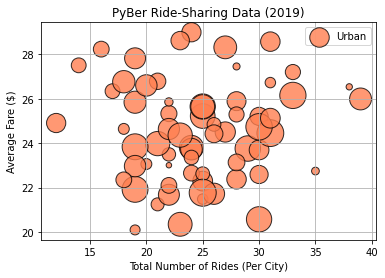

In [71]:
# Build the scatter plots for urban cities.
import numpy as np
plt.scatter(urban_ride_count,
            urban_avg_fare, 
            s=10*urban_driver_count,
            edgecolor='black',
            c='coral',
            linewidths=1,
            alpha=0.8,
            label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend()
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
# plt.xticks(np.arange(0,45,step=5.0))
# plt.yticks(np.arange(20,45,step=5.0))
plt.grid(True)

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

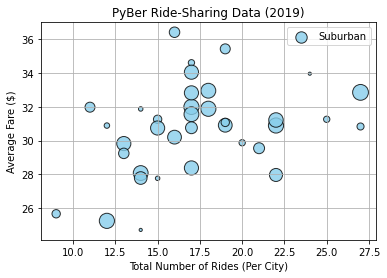

In [72]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count,
           c='skyblue',
           edgecolor='black',
           alpha=0.8,
           linewidths=1,
           label='Suburban')
plt.legend()
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.title('PyBer Ride-Sharing Data (2019)')

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

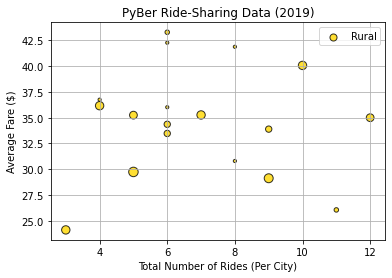

In [74]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_driver_count,
           c='gold',
           edgecolor='black',
           alpha=0.8,
           linewidths=1,
           label='Rural')
plt.legend()
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.title('PyBer Ride-Sharing Data (2019)')

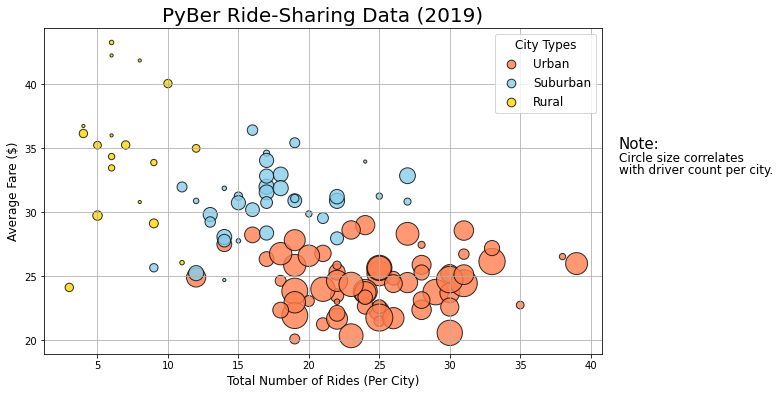

In [87]:
#add scatter charts for each type of city

plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,
            urban_avg_fare, 
            s=10*urban_driver_count,
            edgecolor='black',
            c='coral',
            linewidths=1,
            alpha=0.8,
            label='Urban')

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count,
           c='skyblue',
           edgecolor='black',
           alpha=0.8,
           linewidths=1,
           label='Suburban')

plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_driver_count,
           c='gold',
           edgecolor='black',
           alpha=0.8,
           linewidths=1,
           label='Rural')

# Incorporate the other graph properties
plt.ylabel('Average Fare ($)' , fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)
plt.title('PyBer Ride-Sharing Data (2019)' , fontsize=20)

# #Add legend
# plt.legend()

#Create a legend
lgnd = plt.legend(fontsize='12', 
                  mode='Expanded',
                 scatterpoints=1,
                 loc='best',
                 title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about the circle size
plt.text(42,35,"Note:",fontsize='15')
plt.text(42,34,"Circle size correlates",fontsize='12')
plt.text(42,33,"with driver count per city.",fontsize='12')

#save the figure
plt.savefig('Analysis/Fig1.png')

#Show the data
plt.show()